## Fair Value Gaps (FVG)

Fair Value Gaps are a concept from price action trading and smart money concepts(SMC) they are usually used in forex, crypto, and stock markets and are used to identify imbalances in price action that may get "filled" or "retested".

FVG refers to inefficiency or imbalance in price movement where price does not trade within certain range between 2 candles. From liquidity theory when price moves too quickly in one direction that it leaves behind a gap that hasn't been "efficiently traded" it suggests a potential future reversals or retracement.

Example:
Let there be candles C1, C2 and C3
Conditions for FVG:
1. if C2.low > C1.high and C2.low > C3.high (bullish gap)
2. if C2.high < C1.low and C2.high < C3.low (bearish gap)
Meaning price jumped in C2 and never traded back to previous high or next high and market may fill the gap and vice-versa for bearish gap.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%***********************]  1 of 1 completed

1667 trades done
Bullish FVG 5 avg returns: 0.11%
Medium sized fvgs = 833
Medium bullish FVG returns 5 avg returns: 0.09%
1016 trades done
Bearish FVG 5 avg returns: 0.46%
Medium sized fvgs = 508
Medium bullish FVG returns 5 avg returns: 0.38%


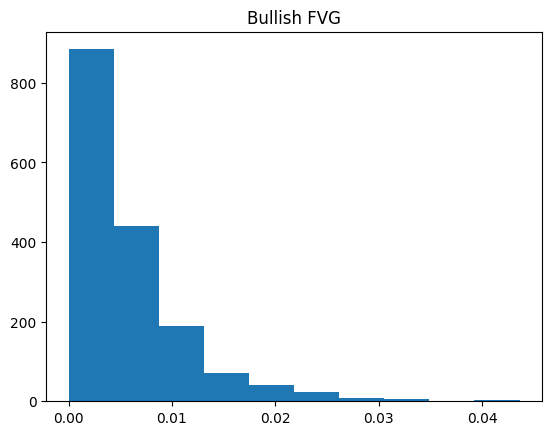

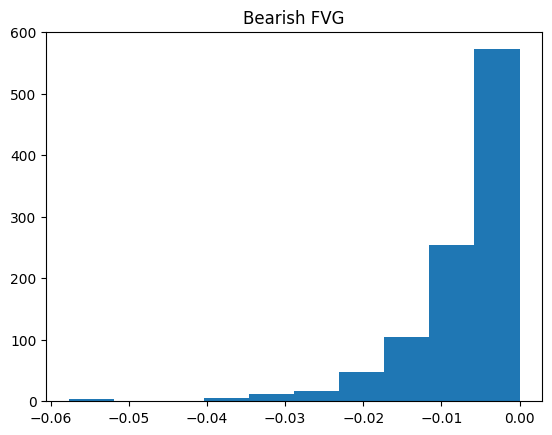

In [97]:
TICKER = 'SPY'
LOOKBACK = 10000
HOLDING_PERIOD = 5

def get_data(tickers):
    df = yf.download(tickers=tickers, period='max', auto_adjust=True)
    df.columns = df.columns.get_level_values(0) # flatten the header cols
    # only get data of interest
    return df.iloc[-LOOKBACK:, :]

# low of today is higher than high price 2days ago
def bull_fvg(df):
    df["High_2prev"] = df["High"].shift(2)
    df["Bull_FVG"] = (df["Low"] > df["High_2prev"]).astype(int)
    df["Bull_FVG_Val"] = (df["Low"] - df["High_2prev"]) * df["Bull_FVG"] / df["Close"]
    fvg_subset = df[df["Bull_FVG_Val"] > 0]
    plt.figure()
    plt.title("Bullish FVG")
    plt.hist(fvg_subset["Bull_FVG_Val"], bins=10)
    return df

# high of today is lower than low price 2days ago
def bear_fvg(df):
    df["Low_2prev"] = df["Low"].shift(2)
    df["Bear_FVG"] = (df["High"] < df["Low_2prev"]).astype(int)
    df["Bear_FVG_Val"] =( df["High"] - df["Low_2prev"]) * df["Bear_FVG"] / df["Close"]
    fvg_subset = df[df["Bear_FVG_Val"] < 0]
    plt.figure()
    plt.title("Bearish FVG")
    plt.hist(fvg_subset["Bear_FVG_Val"], bins=10)
    return df

# experimenting with medium fvg
def assess_bull_fvg(df, holding_period=HOLDING_PERIOD):
    return_col = f"Returns_{holding_period}_period"
    df[return_col] = df["Close"].shift(-holding_period) / df["Close"]
    fvg_subset = df[df["Bull_FVG_Val"] > 0]
    print(f"{len(fvg_subset)} trades done")
    print(f"Bullish FVG {holding_period} avg returns: {(fvg_subset[return_col].mean() - 1) * 100:.2f}%")
    # defining quantiles
    lower = fvg_subset["Bull_FVG_Val"].quantile(0.25)
    upper = fvg_subset["Bull_FVG_Val"].quantile(0.75)

    fvg_medium_val = fvg_subset[
        (fvg_subset["Bull_FVG_Val"] >= lower) & (fvg_subset["Bull_FVG_Val"] <= upper)
    ]
    print(f"Medium sized fvgs = {len(fvg_medium_val)}")
    print(f"Medium bullish FVG returns {holding_period} avg returns: {(fvg_medium_val[return_col].mean() - 1) * 100:.2f}%")
    return df

def assess_bear_fvg(df, holding_period=HOLDING_PERIOD):
    return_col = f"Returns_{holding_period}_period"
    df[return_col] = df["Close"].shift(-holding_period) / df["Close"]
    fvg_subset = df[df["Bear_FVG_Val"] < 0]
    print(f"{len(fvg_subset)} trades done")
    print(f"Bearish FVG {holding_period} avg returns: {(fvg_subset[return_col].mean() - 1) * 100:.2f}%")

    # defining quantiles
    lower = fvg_subset["Bear_FVG_Val"].quantile(0.25)
    upper = fvg_subset["Bear_FVG_Val"].quantile(0.75)

    fvg_medium_val = fvg_subset[
        (fvg_subset["Bear_FVG_Val"] >= lower) & (fvg_subset["Bear_FVG_Val"] <= upper)
    ]
    print(f"Medium sized fvgs = {len(fvg_medium_val)}")
    print(f"Medium bullish FVG returns {holding_period} avg returns: {(fvg_medium_val[return_col].mean() - 1) * 100:.2f}%")
    return df

def main():
    df = get_data(TICKER)
    df = bull_fvg(df)
    df = bear_fvg(df)
    df = assess_bull_fvg(df)
    df = assess_bear_fvg(df)
    return df


df = main()

In [39]:
df

Price,Close,High,Low,Open,Volume,High_2prev,Bull_FVG,Bull_FVG_Val,Low_2prev,Bear_FVG,Bear_FVG_Val
Date,,,,,,,,,,,
2021-08-13,421.388489,421.407378,420.585244,421.076627,39470300,NaN,0,NaN,NaN,0,NaN
2021-08-16,422.380737,422.513020,418.506286,420.074967,73740000,NaN,0,NaN,NaN,0,NaN
2021-08-17,419.611908,420.481280,416.597398,419.800888,92673900,421.407378,0,-0.000000,420.585244,1,-0.000248
2021-08-18,415.019196,420.169384,414.773519,418.591244,89351900,422.513020,0,-0.000000,418.506286,0,0.000000
2021-08-19,415.661804,416.871415,412.127563,412.269306,92812200,420.481280,0,-0.000000,416.597398,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,621.719971,626.340027,619.289978,626.299988,140103600,637.679993,0,-0.000000,631.539978,1,-0.008364
2025-08-04,631.169983,631.219971,625.580017,625.669983,73218000,639.849976,0,-0.000000,630.770020,0,0.000000
2025-08-05,627.969971,632.609985,627.039978,631.789978,68051400,626.340027,1,0.001115,619.289978,0,0.000000


KeyError: 'Price_5_days_ago'